In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# load color image
my_img = Image.open('dog.jpg')

In [4]:
# separate into R, G, and B channels
img_arr = np.array(my_img)
R, G, B = img_arr[:, :, 0], img_arr[:, :, 1], img_arr[:, :, 2]

In [8]:
# a function to apply SVD to each channel
def apply_svd(channel, k):
    U, sigma, VT = np.linalg.svd(channel)
    compressed_sigma = np.diag(sigma[:k])
    compressed_channel = np.dot(U[:, :k], np.dot(compressed_sigma, VT[:k, :]))
    return compressed_channel

In [26]:
original_size = img_arr.size

In [28]:
# Fonction pour reconstruire l'image compressée en utilisant SVD
def reconstruct_image(k):
    compressed_R = apply_svd(R, k)
    compressed_G = apply_svd(G, k)
    compressed_B = apply_svd(B, k)
    compressed_img_arr = np.stack((compressed_R, compressed_G, compressed_B), axis=-1)
    return compressed_img_arr

# Fonction pour calculer le rapport de compression
def compression_ratio(k):
    compressed_size = (k * (img_arr.shape[0] + img_arr.shape[1] + 3))
    return compressed_size / original_size

# Fonction pour afficher l'image originale et l'image compressée
def display_image(my_image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_arr)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(my_image.astype(np.uint8))
    axes[1].set_title('Compressed Image')
    axes[1].axis('off')
    plt.show()

In [30]:
# range of singular values to retain
K = [10, 50, 100, 300, 500, 700]

Origin vs Compressed for k =  10


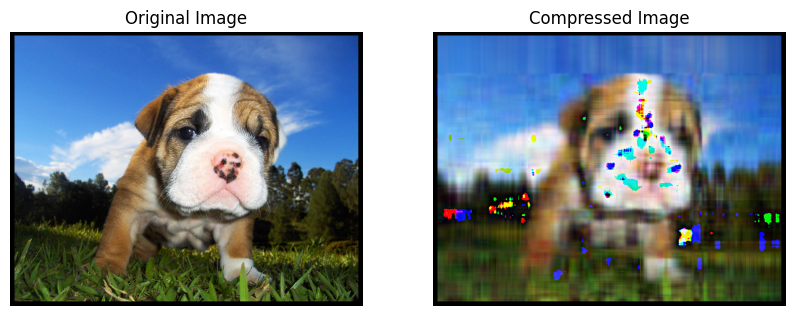

Origin vs Compressed for k =  50


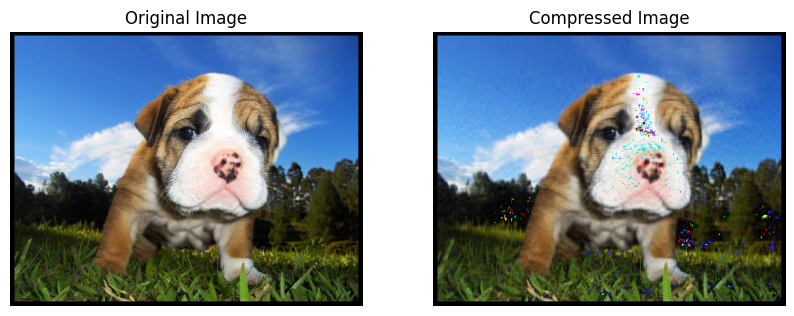

Origin vs Compressed for k =  100


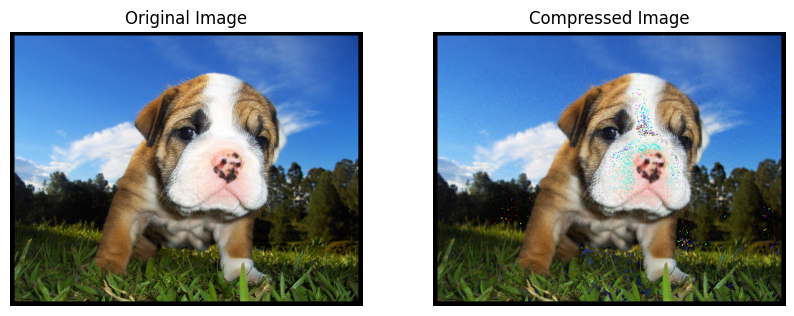

Origin vs Compressed for k =  300


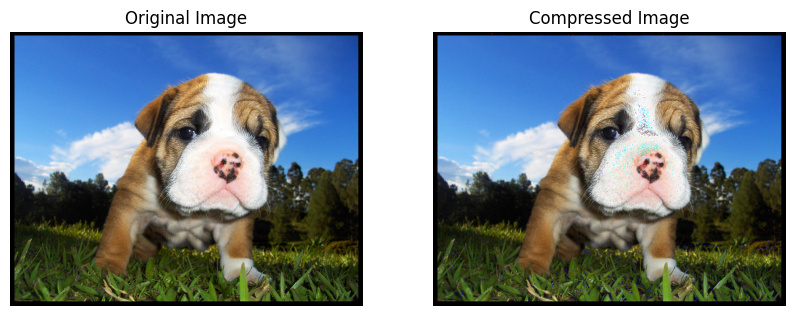

Origin vs Compressed for k =  500


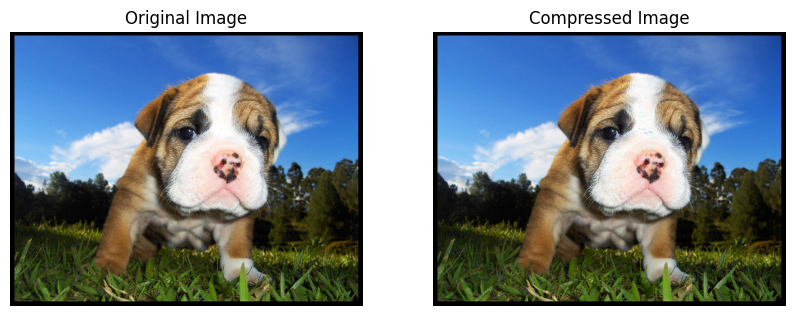

Origin vs Compressed for k =  700


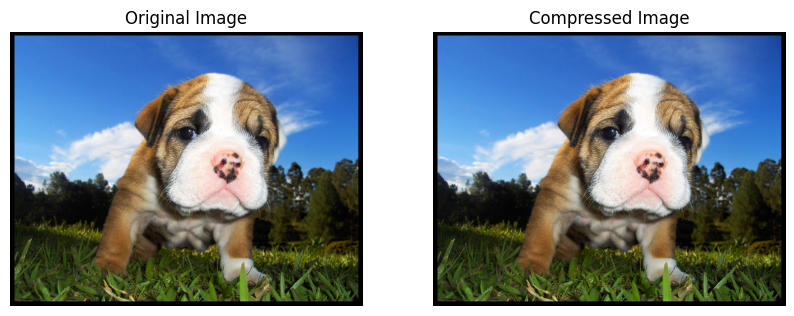

In [31]:
for k in K :
  compressed_img = reconstruct_image(k)
  print('Origin vs Compressed for k = ', k)
  display_image(compressed_img)

In [32]:
for k in K :
  compression_ratio_value = compression_ratio(k)
  print('Compression Ratio for k = ', k, f' est: {compression_ratio_value:.2f}')

Compression Ratio for k =  10  est: 0.01
Compression Ratio for k =  50  est: 0.04
Compression Ratio for k =  100  est: 0.07
Compression Ratio for k =  300  est: 0.22
Compression Ratio for k =  500  est: 0.37
Compression Ratio for k =  700  est: 0.52


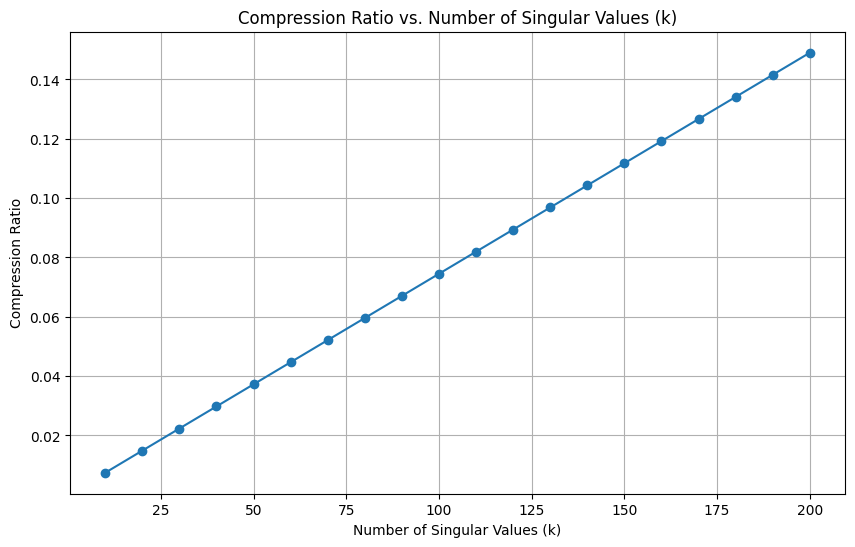

In [33]:
k_values = range(10, 201, 10)
compression_ratios = [compression_ratio(k) for k in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k_values, compression_ratios, marker='o', linestyle='-')
plt.title('Compression Ratio vs. Number of Singular Values (k)')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Compression Ratio')
plt.grid(True)
plt.show()